In [14]:
import pandas as pd
import numpy as np

In [15]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [16]:
data = np.array(raw_data)

In [17]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]

In [18]:
no_train = int(0.8*no_of_examples)
print(no_train,no_of_examples - no_train)

17290 4323


In [19]:
X_train = np.concatenate((data[:no_train,:-1],np.zeros((no_train,1))+1),axis=1)
y_train = data[:no_train,-1]
X_test = np.concatenate((data[no_train:,:-1],np.zeros((no_of_examples-no_train,1))+1),axis=1)
y_test = data[no_train:,-1].reshape(-1,1)

In [20]:
X_mean = np.mean(X_train[:,:-1],axis=0)
X_std = np.std(X_train[:,:-1],axis=0)
X_train[:,:-1] = (X_train[:,:-1] - X_mean)/X_std
X_test[:,:-1] = (X_test[:,:-1]-X_mean)/X_std
#print(X_test,X_train)

In [21]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [22]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) 
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W)
    
    def train_IRLS(self):
        self.W -= np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T.dot(self.X).dot(self.W) - self.X.T.dot(self.y))
        
        return loss
        
        
        
        

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
SGD_plot = []
print("Gradient Descent")
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print("Iteration "+str(i+1)+": ",test_loss)
    SGD_plot.append(test_loss)
sgd_model_parms = model.W

Gradient Descent
Iteration 1:  621762.636703
Iteration 2:  547895.29738
Iteration 3:  491178.145863
Iteration 4:  448175.074288
Iteration 5:  415944.467625
Iteration 6:  392010.513711
Iteration 7:  374344.126666
Iteration 8:  361332.861443
Iteration 9:  351733.441217
Iteration 10:  344612.061581
Iteration 11:  339281.819279
Iteration 12:  335245.063792
Iteration 13:  332144.869974
Iteration 14:  329726.684869
Iteration 15:  327809.315387
Iteration 16:  326263.634431
Iteration 17:  324997.268693
Iteration 18:  323943.735372
Iteration 19:  323054.799997
Iteration 20:  322295.125465
Iteration 21:  321638.532392
Iteration 22:  321065.384641
Iteration 23:  320560.757539
Iteration 24:  320113.149677
Iteration 25:  319713.572378
Iteration 26:  319354.902017
Iteration 27:  319031.415867
Iteration 28:  318738.456629
Iteration 29:  318472.187659
Iteration 30:  318229.412547
Iteration 31:  318007.440679
Iteration 32:  317803.985905
Iteration 33:  317617.08929
Iteration 34:  317445.059522
Iteratio

In [31]:
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
IRLS_plot = []
print("IRLS")
for i in range(no_of_epochs):
    loss = model.train_IRLS()
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print("Iteration "+str(i+1)+": ",test_loss)
    IRLS_plot.append(test_loss)
irls_model_params = model.W

IRLS
Iteration 1:  314935.642707
Iteration 2:  314935.642707
Iteration 3:  314935.642707
Iteration 4:  314935.642707
Iteration 5:  314935.642707
Iteration 6:  314935.642707
Iteration 7:  314935.642707
Iteration 8:  314935.642707
Iteration 9:  314935.642707
Iteration 10:  314935.642707
Iteration 11:  314935.642707
Iteration 12:  314935.642707
Iteration 13:  314935.642707
Iteration 14:  314935.642707
Iteration 15:  314935.642707
Iteration 16:  314935.642707
Iteration 17:  314935.642707
Iteration 18:  314935.642707
Iteration 19:  314935.642707
Iteration 20:  314935.642707
Iteration 21:  314935.642707
Iteration 22:  314935.642707
Iteration 23:  314935.642707
Iteration 24:  314935.642707
Iteration 25:  314935.642707
Iteration 26:  314935.642707
Iteration 27:  314935.642707
Iteration 28:  314935.642707
Iteration 29:  314935.642707
Iteration 30:  314935.642707
Iteration 31:  314935.642707
Iteration 32:  314935.642707
Iteration 33:  314935.642707
Iteration 34:  314935.642707
Iteration 35:  314

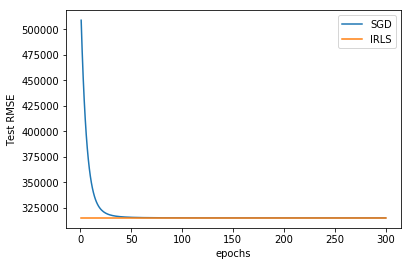

In [27]:
SGD_, = plt.plot(1+np.array(range(no_of_epochs)),SGD_plot)
IRLS_, = plt.plot(1+np.array(range(no_of_epochs)),IRLS_plot)
plt.xlabel("epochs")
plt.ylabel("Test RMSE")
plt.legend([SGD_, IRLS_],["SGD","IRLS"])
plt.savefig("1b_TestRMSEvsEpochs.png")

**Preferred optimization Algorithm for this Problem :**
For this problem, we would want to use Iterative re-weighted Least Square Algorithm. As we can see from the RMSE vs no_of_iterations plot, this method gives us the correct result in 1 epoch, i.e., finds the solution to the optimization problem directly. 

In [34]:
sgd_model_parms.T

array([[  4.28900544e-02,   2.80593780e-02,   4.46814925e-02,
          4.81656579e-01,   2.38139092e-15]])

In [35]:
irls_model_params.T

array([[  4.28897509e-02,   2.80575827e-02,   4.46796089e-02,
          4.81659611e-01,   1.29922501e-16]])